# **Will they Drop Out?**
In this notebook, we try to analyze data that contains various statistics about college students, such as their GPA's, place of origin, mother and father's occupations, etc. and try to predict whether or not the student will drop out.

By: Eric Yang, Subin Lee, EunJung Kim, and Eli Zunker

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive

# **Data Prep and Feature Engineering**
A vast majority of our data was categorical, so we one hot encoded all of the categorical data so that we could use them in the later models. We also have the code to drop all missing values so that the notebook could be flexible if more data was added, however with the current dataset there were no missing values.

In [ ]:
data = pd.read_csv('dataset.csv', header = 0)

column_to_encode = ["Marital status", "Application mode", "Course",
                    "Daytime/evening attendance","Previous qualification",
                    "Nacionality", "Mother's qualification", "Father's qualification",
                    "Mother's occupation", "Father's occupation"]
for column in column_to_encode:
  encoded_columns = pd.get_dummies(data[column], prefix = column)
  data = pd.concat([data, encoded_columns], axis=1)
  data = data.drop(column, axis=1)

data.dropna(inplace=True)
data.head()

,Application order,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),...,Father's occupation_37,Father's occupation_38,Father's occupation_39,Father's occupation_40,Father's occupation_41,Father's occupation_42,Father's occupation_43,Father's occupation_44,Father's occupation_45,Father's occupation_46
0,5,1,0,0,1,1,0,20,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,1,0,19,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1,0,0,0,1,0,19,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0,0,1,0,0,20,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,45,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

Here below, we make the distinction of classifying all of the dropouts together and putting all of the graduates and enrollees together, since the main goal of this project was to predict whether or not they'd drop out.

In [ ]:
# So there are 3 unique values in target column which we can replace by¶
## Dropout -> 0
## Enrolled -> 1
## Graduate -> 1
print(data['Target'].unique())

data['Target'] = data['Target'].map({
    'Dropout':0,
    'Graduate':1,
    'Enrolled':1
})
data['Target'].head()

['Dropout' 'Graduate' 'Enrolled']


0    0
1    1
2    0
3    1
4    1
Name: Target, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# X: Features, y: Target
X = data.drop(columns=['Target'])
y = data['Target']
# split data 80% for train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Data Exploration & Analysis**
Before we start conducting Supervised Machine Learning on the data, we decide to explore the corelation in the data. Using the data, we generated and graphed a correlation heatmap with whole features. The graph allows us to observe which features have high positive correlations with our target.

The heatmap is annotated with correlation coefficients and colored using the coolwarm color map. By examining the heatmap, we were able to identify features with high positive correlations to our target, which allows us to better understand the structure the data and how we should choose and fine tune our models to produce the most accurate predictions.

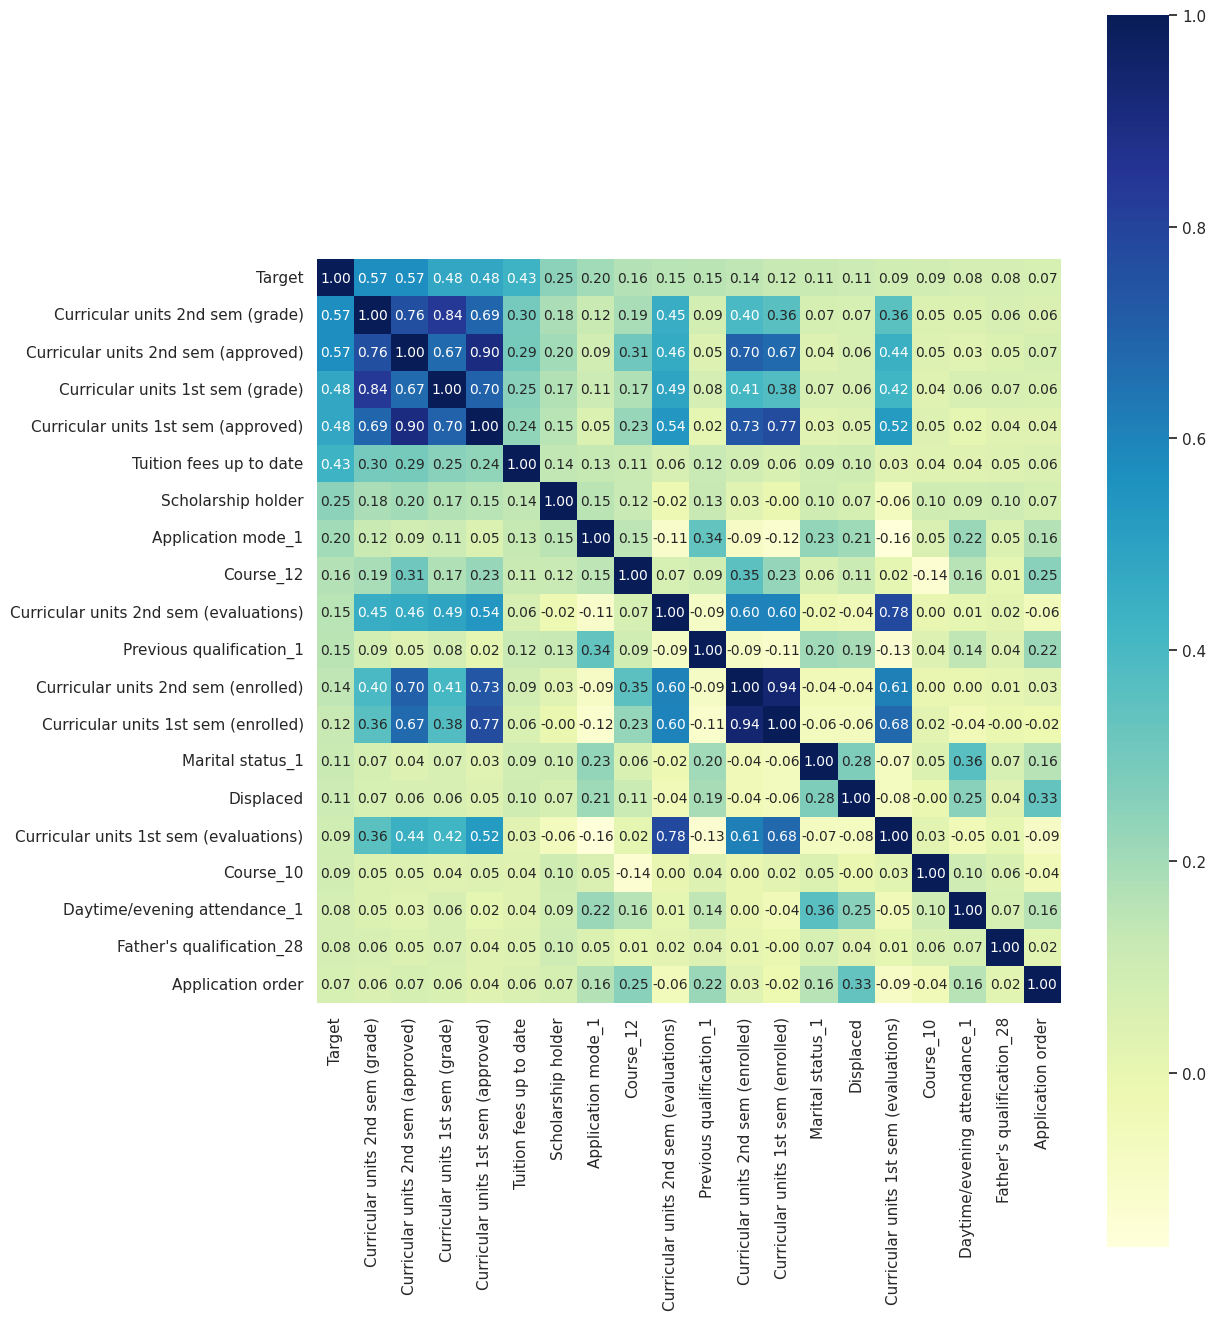

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the number of features to display
k = 20 

# Calculate correlation matrix
corr_matrix = data.corr()

# Get the k features that are most positively correlated with the target column
cols = corr_matrix.nlargest(k, 'Target')['Target'].index
# Get the k features that are most negatively correlated with the target column
#cols2 = corr_matrix.nsmallest(k, 'Target')['Target'].index
#print(cols2)

# Calculate correlation coefficients for these k features
cm = np.corrcoef(data[cols].values.T)
#cm2 = np.corrcoef(data[cols2].values.T)

# Generate heatmaps
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(12,16))
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
            yticklabels=cols.values, xticklabels=cols.values, cmap="YlGnBu", ax=ax)
plt.show()

#sns.set(font_scale=1)
#fig, ax = plt.subplots(figsize=(12,16))
#sns.heatmap(cm2, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
#            yticklabels=cols2.values, xticklabels=cols2.values, cmap="YlGnBu", ax=ax)
#plt.show()



KEYS:

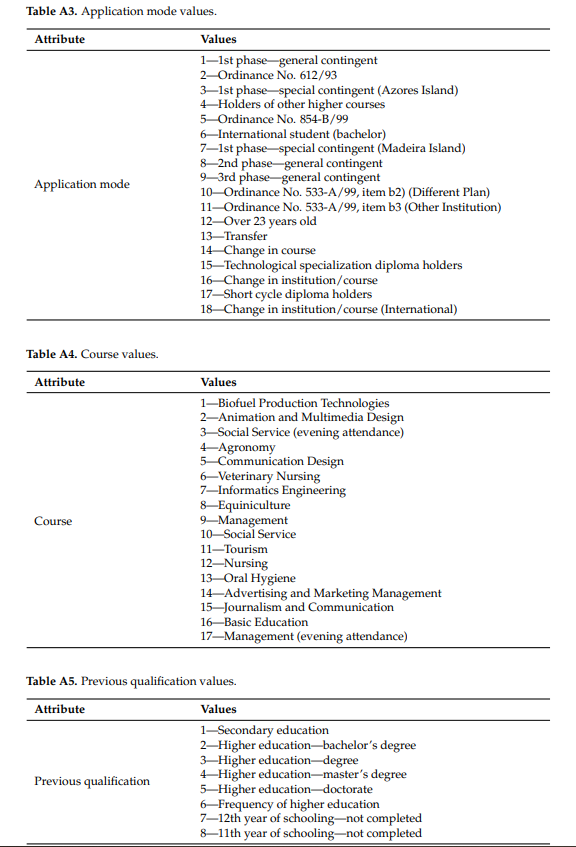

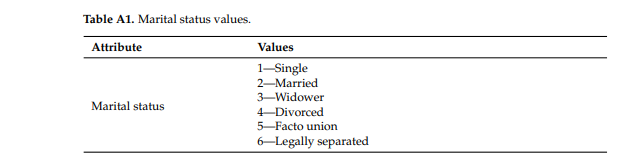

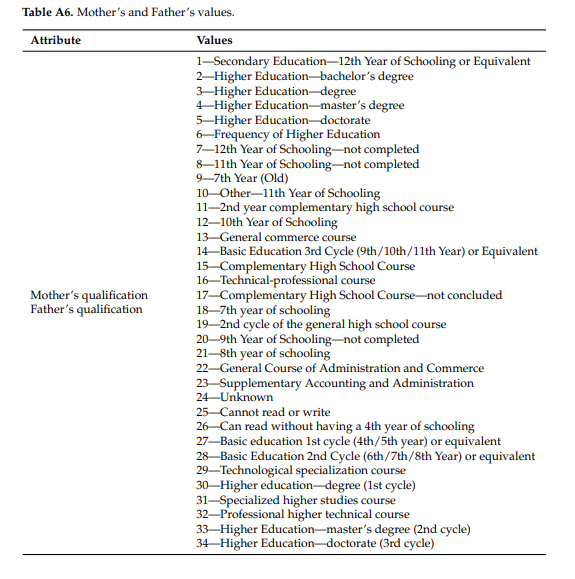

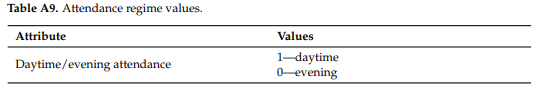

By looking at the correlation table and the above keys, we see a positive relationship between those with higher grades, are up to date in paying their tuition, and have paid their tuition are more likely to not drop out.

In the commented code, you can see an attempt to explore the negative relationship between dropping out and the features. We couldn't quite get it to work correctly, however some of the data was promising, as it seemed to show in some sense that being older, married, and taking night time classes had a negative relationship with dropping out. This would make sense, as this crowd has had more time to figure out whether or not college is truly for them or have to support a family, so dropping out isn't as much of an option for them.

In [ ]:
# Reselect 20 features that have a strong positive correlation with the target variable.
X_cut = data[cols[1:]]
y_cut = data['Target']
X_cut.head()

,Curricular units 2nd sem (grade),Curricular units 2nd sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (approved),Tuition fees up to date,Scholarship holder,Application mode_1,Course_12,Curricular units 2nd sem (evaluations),Previous qualification_1,Curricular units 2nd sem (enrolled),Curricular units 1st sem (enrolled),Marital status_1,Displaced,Curricular units 1st sem (evaluations),Course_10,Daytime/evening attendance_1,Father's qualification_28,Application order
0,0.000000,0,0.000000,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,5
1,13.666667,6,14.000000,6,0,0,0,0,6,1,6,6,1,1,6,0,1,0,1
2,0.000000,0,0.000000,0,0,0,1,0,0,1,6,6,1,1,0,0,1,0,5
3,12.400000,5,13.428571,6,1,0,0,0,10,1,6,6,1,1,8,0,1,0,2
4,13.000000,6,12.333333,5,1,0,0,0,6,1,6,6,0,0,9,0,0,1,1


#**Single Models**
## **KNN and Decision Tree Models using Pipelines**
Below, we use three different pipelines all with KNN as the classifier to test which scaling method works best with our data.

Acknowledgement: We could have used unsupervised learning models, such as KMeans, however since the data had labels to begin with, there's only two groups, and it has an extremely high dimensionality, we decided that supervised learning techniques such as KNN and Decision Trees would be more beneficial to look into since they are more suited for this data. Perhaps if this project was done again, it would be worth it to see how supervised vs. unsupervised stacks up against itself.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV

p_grid = {
    'max_depth': [10, 50, 100],
    'max_features': [100, 150, 200, 248]
}
gscv = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = p_grid, cv = 5, scoring = 'accuracy')
gscv.fit(X_train, y_train)
print("Best Max Depth and Max Features:", gscv.best_params_)
dtc_cv_scores = cross_val_score(gscv, X, y, cv = 5)
print("Decision Tree Cross Validation Score:", dtc_cv_scores.mean(), "\n")

pipeline_standard = Pipeline(steps = [("scaler", StandardScaler()), ("pca", PCA()), ("classifier", KNeighborsClassifier())])
pipeline_minmax = Pipeline(steps = [("scaler", MinMaxScaler()), ("pca", PCA()), ("classifier", KNeighborsClassifier())])
pipeline_robust = Pipeline(steps = [("scaler", RobustScaler()), ("pca", PCA()), ("classifier", KNeighborsClassifier())])

#Since we have 248 dimensions, to avoid reducing the dimensions too much, 50 is the minimum for PCA
#In the same vain, we have thousands of data points so 10 nearest neighbors is the minimum and 50 is the maximum.
p_grid = {
    'pca__n_components': list(range(50, 248, 50)),
    'classifier__n_neighbors': list(range(10, 50, 10))
}

print("Standard Scaler KNN")
gscv = GridSearchCV(estimator = pipeline_standard, param_grid = p_grid, cv = 5, scoring = 'accuracy')
gscv.fit(X_train, y_train)
print("Best PCA reduction dimension and N Nearest Neighbors:", gscv.best_params_)
knn_cv_scores = cross_val_score(gscv, X, y, cv = 5)
print("KNN Standard Scalar Average Cross Validation Score:", knn_cv_scores.mean(), "\n")

print("MinMax Scaler KNN")
gscv = GridSearchCV(estimator = pipeline_minmax, param_grid = p_grid, cv = 5, scoring = 'accuracy')
gscv.fit(X_train, y_train)
print("Best PCA reduction dimension and N Nearest Neighbors:", gscv.best_params_)
knn_cv_scores = cross_val_score(gscv, X, y, cv = 5)
print("KNN MinMax Scaler Average Cross Validation Score:", knn_cv_scores.mean(), "\n")

print("Robust Scaler KNN")
gscv = GridSearchCV(estimator = pipeline_robust, param_grid = p_grid, cv = 5, scoring = 'accuracy')
gscv.fit(X_train, y_train)
print("Best PCA reduction dimension and N Nearest Neighbors:", gscv.best_params_)
knn_cv_scores = cross_val_score(gscv, X, y, cv = 5)
print("KNN Robust Scaler Average Cross Validation Score:", knn_cv_scores.mean(), "\n")


Best Max Depth and Max Features: {'max_depth': 10, 'max_features': 248}
Decision Tree Cross Validation Score: 0.8505854232175268 

Standard Scaler KNN
Best PCA reduction dimension and N Nearest Neighbors: {'classifier__n_neighbors': 10, 'pca__n_components': 50}
KNN Standard Scalar Average Cross Validation Score: 0.811479407930056 

MinMax Scaler KNN
Best PCA reduction dimension and N Nearest Neighbors: {'classifier__n_neighbors': 20, 'pca__n_components': 50}
KNN MinMax Scaler Average Cross Validation Score: 0.7798330649078407 

Robust Scaler KNN
Best PCA reduction dimension and N Nearest Neighbors: {'classifier__n_neighbors': 20, 'pca__n_components': 50}
KNN Robust Scaler Average Cross Validation Score: 0.8304657821407572 



From the results above, we see that using the Robust Scaler with 20 nearest neighbors and reducing the dimensions to 50 worked best for our data. Also, keeping the trees shallow while allowing for all of the features to be present yielded the highest accuracy, which makes is reasonable. Keeping the tree shallower prevents us from overfitting, which we are vunerable to with this dataset since there are so many features.

Note: Since there are so many dimensions, the accuracy of the decision tree is naturally going to be higher than KNN due to the Curse of Dimensionality. Since decision trees are more impervious to extra features, the accuracy doesn't suffer as much.

# **Ensemble Models**
##**Random Forests and Gradient Boosting**
Below, we use the Random Forest and Gradient Boosting models to see if the ensemble methods would provide even better accuracy.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

p_grid = {
    'n_estimators': [50, 100, 150, 200],
}
# Ensemble
# Random Forest
rf = RandomForestClassifier(random_state=42)
gscv = GridSearchCV(estimator = rf, param_grid = p_grid, cv = 5, scoring = 'accuracy')
rf_cv_scores = cross_val_score(gscv, X, y, cv=5)
print("Best Number of Trees:", gscv.best_params_)
print("Random Forest Average Cross Validation Score:", rf_cv_scores.mean(), "\n")

p_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': list(np.arange(0.1, 2.1, 0.5))
}

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gscv = GridSearchCV(estimator = gb, param_grid = p_grid, cv = 5, scoring = 'accuracy')
gscv.fit(X_train, y_train)
gb_cv_scores = cross_val_score(gscv, X, y, cv=5)
print("Best Number of Boosting Stages and Learning Rate:", gscv.best_params_)
print("Gradient Boosting Cross Validation Score:", gb_cv_scores.mean(), "\n")

# Ensemble
# Random Forest

#gscv = GridSearchCV(estimator = rf, param_grid = p_grid, cv = 5, scoring = 'accuracy')
#gscv.fit(standard_X_train, y_train)
#rf_pred = rf.predict(standard_X_test)
#print("w standardscaler")
#rf_cv_scores = cross_val_score(gscv, standard_X_train, y_train, cv=5)
#print("Random Forest Cross Validation Score:", rf_cv_scores.mean())

# Gradient Boosting
#gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
#gb.fit(standard_X_train, y_train)
#gb_pred = gb.predict(standard_X_test)
#gb_cv_scores = cross_val_score(gb, standard_X_train, y_train, cv=5)
#print("Gradient Boosting Cross Validation Score:", gb_cv_scores.mean(), "\n")

# Ensemble
# Random Forest
#rf = RandomForestClassifier(n_estimators=100, random_state=42)
#rf.fit(minmax_X_train, y_train)
#rf_pred = rf.predict(minmax_X_test)
#print("w minmaxscaler")
#rf_cv_scores = cross_val_score(rf, minmax_X_train, y_train, cv=5)
#print("Random Forest Cross Validation Score:", rf_cv_scores.mean())

# Gradient Boosting
#gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
#gb.fit(minmax_X_train, y_train)
#gb_pred = gb.predict(minmax_X_test)
#gb_cv_scores = cross_val_score(gb, minmax_X_train, y_train, cv=5)
#print("Gradient Boosting Cross Validation Score:", gb_cv_scores.mean(), "\n")

# Ensemble
# Random Forest
#rf = RandomForestClassifier(n_estimators=100, random_state=42)
#rf.fit(robust_X_train, y_train)
#rf_pred = rf.predict(robust_X_test)
#print("w Robustscaler")
#rf_cv_scores = cross_val_score(rf, robust_X_train, y_train, cv=5)
#print("Random Forest Cross Validation Score:", rf_cv_scores.mean())

# Gradient Boosting
#gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
#gb.fit(robust_X_train, y_train)
#gb_pred = gb.predict(robust_X_test)
#gb_cv_scores = cross_val_score(gb, robust_X_train, y_train, cv=5)
#print("Gradient Boosting Cross Validation Score:", gb_cv_scores.mean(), "\n")

Best Number of Trees: {'n_estimators': 150}
Random Forest Average Cross Validation Score: 0.8713804739627271 

Best Number of Boosting Stages and Learning Rate: {'learning_rate': 0.1, 'n_estimators': 100}
Gradient Boosting Cross Validation Score: 0.8770317253368102 



Reasoning with the best parameters that the GridSearchCV came up with, we can see that having more trees helped for the Random Forest Classifier.

And for the Gradient Boosting, we can see that only 100 stages were needed and that a lower learning rate was preferable. This makes sense, as a lower learning rate leads to smaller jumps in the changing of the data so the model is less likely to over correct.

Looking at the results, we see that Gradient Boosting yields the highest average accuracy when cross validation is conducted. It achieves an impressive accuracy score of around 0.877, and thus we will be choosing the Gradient Boosting Ensemble method as our final model.

Note that we tried testing out different scalers for both the Random Forest Classifier and the Gradient Boosting Classifier. However, the average accuracy were pretty similar, and after some research, we found out that Random Forest and Gradient Boosting both do not require the data to be scaled. Therefore we decided to drop the scaler tests.


In [ ]:
# split data 80% for train
X_train_cut, X_test_cut, y_train_cut, y_test_cut = train_test_split(X_cut, y_cut, test_size=0.2, random_state=42)

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gscv = GridSearchCV(estimator = gb, param_grid = p_grid, cv = 5, scoring = 'accuracy')
gscv.fit(X_train_cut, y_train_cut)
gb_cv_scores = cross_val_score(gscv, X_cut, y_cut, cv=5)
print("Best Number of Boosting Stages and Learning Rate:", gscv.best_params_)
print("Gradient Boosting Cross Validation Score:", gb_cv_scores.mean(), "\n")


Best Number of Boosting Stages and Learning Rate: {'learning_rate': 0.1, 'n_estimators': 50}
Gradient Boosting Cross Validation Score: 0.8657297338752971 



In order to see if reducing the features would increase the accuracy, we used the features from the earlier correlation map as a cut of the data and put it into the highest performing GridSearch and kept the parameter grid to test if the the change in data changes which hyper parameters the model should choose.

As we can observe, the learning rate remains the same but the stages drop, which would make sense as we've dropped the number of features. As for the accuracy, it took a slight hit, so we will not be using the cut data for the final model.

# **Final Model**

Here, we use the Gradient Boosting model since it produced the highest accuracy. We still keep the GridSearch Cross Validation because we still need to produce the best parameters for the entire data set.

In [ ]:

final_model = GridSearchCV(estimator = gb, param_grid = p_grid, cv = 5, scoring = 'accuracy')
final_model.fit(X, y)

print("Best hyper parameters for Final Model:", final_model.best_params_)

final_pred = final_model.predict(X)
final_acc = accuracy_score(y, final_pred)
print("Model Accuracy:", final_acc)

Best hyper parameters for Final Model: {'n_estimators': 200}
Model Accuracy: 0.9129746835443038


Testing the final model on the whole data set produces an incredibly high accuracy and the hyper parameters slightly change again. This time, the best amount of boosting stages is increased to 200, which again makes sense, since we have more data.

# **Result**
We selected the 10 features that are most correlated with the target and trained an ensemble model. 
Then, we evaluate the performance of the model using evaluation metrics and plotted the ROC curve to determine how well the model learned.

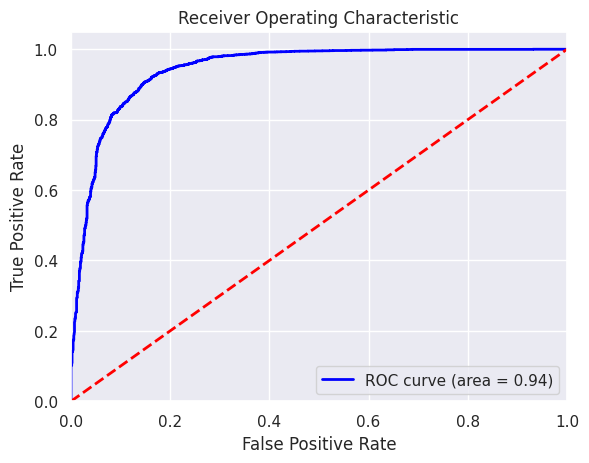

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict class probabilities for the test set using predict_proba() method of the classifier
y_score = final_model.predict_proba(X)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(y, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve for the 1st class
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

# Set x and y axis labels and limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
y_pred = final_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78       316
           1       0.85      0.93      0.89       569

    accuracy                           0.85       885
   macro avg       0.85      0.82      0.83       885
weighted avg       0.85      0.85      0.85       885

